# Multiple Subplots

# 多個子圖表

> Sometimes it is helpful to compare different views of data side by side.
To this end, Matplotlib has the concept of *subplots*: groups of smaller axes that can exist together within a single figure.
These subplots might be insets, grids of plots, or other more complicated layouts.
In this section we'll explore four routines for creating subplots in Matplotlib.

在一些情況中，如果能將不同的數據圖表並列展示，對於我們進行數據分析和比較會很有幫助。 Matplotlib提供了*子圖表*的概念來實現這一點：單個圖表中可以包括一組小的axes用來展示多個子圖表。這些子圖表可以是插圖，網格狀分佈或其他更複雜的佈局。

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
plt.style.use('seaborn-white')

> A potentially confusing feature of Matplotlib is its dual interfaces: a convenient MATLAB-style state-based interface, and a more powerful object-oriented interface. We'll quickly highlight the differences between the two here.

Matplotlib 有兩套接口：一套是很方便的 MATLAB Style 接口，還有一套是更強大的Object-oriented 接口。我們在這裡簡單的介紹一下它們的區別。

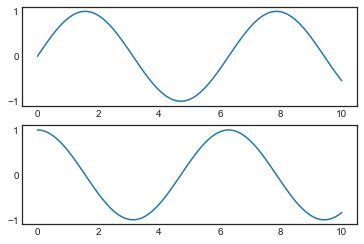

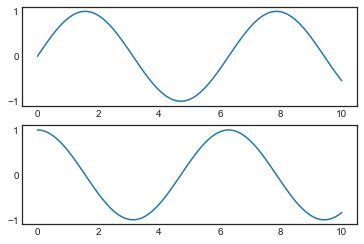

In [2]:
x = np.linspace(0, 10, 100)
plt.figure() 

# MATLAB-style Interface  創建上面第一行的子圖表 - 創建下面第二行的子圖表
plt.subplot(2, 1, 1) 
plt.plot(x, np.sin(x))
plt.subplot(2, 1, 2)
plt.plot(x, np.cos(x))

# Object-oriented interface   首先創建兩個子圖表- fig是兩個子Figure對象，ax是兩個子Axes對象 - 做圖
fig, ax = plt.subplots(2)
ax[0].plot(x, np.sin(x))
ax[1].plot(x, np.cos(x))

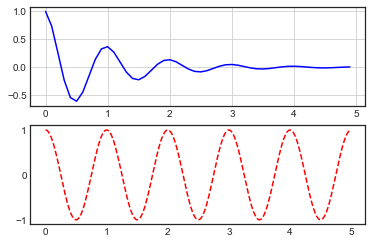

In [3]:
def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

plt.figure(1)
# The subplot() command specifies numrows, numcols, 
# fignum where fignum ranges from 1 to numrows*numcols.
plt.subplot(211)
plt.grid()
plt.plot(t1, f(t1), 'b-')

plt.subplot(212)
plt.plot(t2, np.cos(2*np.pi*t2), 'r--')
plt.show()

## Vertically Stacked Axes 垂直堆疊的子圖表
> The equivalent of command within the object-oriented interface is ``fig.add_axes()``. Let's use this to create two vertically stacked axes:

與上述等價的面向對象接口的語法是`fig.add_axes()`。我們使用這個方法來創建兩個垂直堆疊的子圖表：

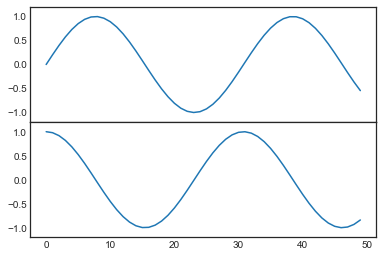

In [4]:
fig = plt.figure() # 獲得figure對象
ax1 = fig.add_axes([0.1, 0.5, 0.8, 0.4],ylim=(-1.2, 1.2)) 
ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.4],ylim=(-1.2, 1.2))

x = np.linspace(0, 10)
ax1.plot(np.sin(x))
ax2.plot(np.cos(x));

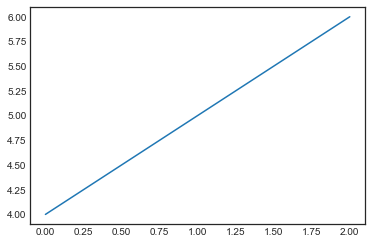

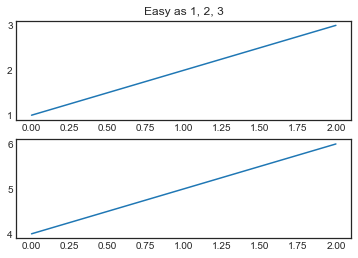

In [5]:
plt.figure(1)                # the first figure
plt.subplot(211)             # the first subplot in the first figure
plt.plot([1, 2, 3])
plt.subplot(212)             # the second subplot in the first figure
plt.plot([4, 5, 6])

plt.figure(2)                # a second figure
plt.plot([4, 5, 6])          # creates a subplot(111) by default

plt.figure(1)                # figure 1 current; subplot(212) still current
plt.subplot(211)             # make subplot(211) in figure1 current
plt.title('Easy as 1, 2, 3') # subplot 211 title
plt.show()

## Plot with categorical variables

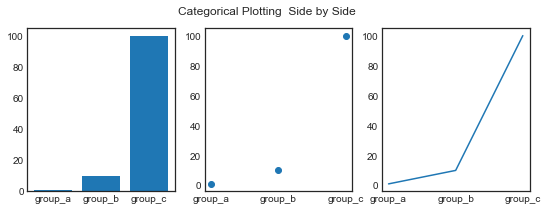

In [6]:
names = ['group_a', 'group_b', 'group_c']
values = [1, 10, 100]

plt.figure(1, figsize=(9, 3))
plt.subplot(1,3,1)

plt.bar(names, values)
plt.subplot(1,3,2)

plt.scatter(names, values)
plt.subplot(1,3,3)

plt.plot(names, values)
plt.suptitle('Categorical Plotting  Side by Side  ')
plt.show()

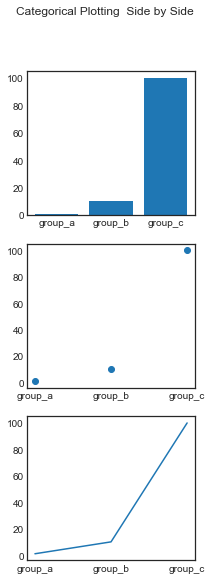

In [7]:
names = ['group_a', 'group_b', 'group_c']
values = [1, 10, 100]

plt.figure(1, figsize=(3, 9))
plt.subplot(3,1,1)

plt.bar(names, values)
plt.subplot(3,1,2)

plt.scatter(names, values)
plt.subplot(3,1,3)

plt.plot(names, values)
plt.suptitle('Categorical Plotting  Side by Side  ')
plt.show()

## `plt.subplot`：簡單網格的子圖表

> Aligned columns or rows of subplots are a common-enough need that Matplotlib has several convenience routines that make them easy to create.
The lowest level of these is ``plt.subplot()``, which creates a single subplot within a grid.
As you can see, this command takes three integer arguments—the number of rows, the number of columns, and the index of the plot to be created in this scheme, which runs from the upper left to the bottom right:

將子圖表的行與列對齊是一個很常見的需求，因此Matplotlib提供了一些簡單的函數來實現它們。這些函數當中最底層的是`plt.subplot()`，它會在網格中創建一個子圖表。函數接受三個整數參數，網格行數，網格列數以及該網格子圖表的序號（從左上角向右下角遞增）：

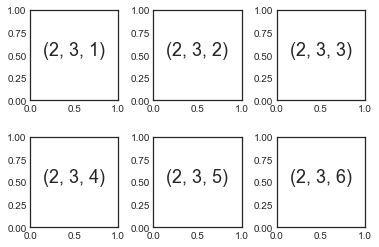

In [8]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)  # 調整這些子圖表之間的距離 high,width 40%

for i in range(1, 7):
    ax = fig.add_subplot(2, 3, i)        # 2x3 面向對象接口 , i =index
    ax.text(0.5, 0.5, str((2, 3, i)),fontsize=18, ha='center')

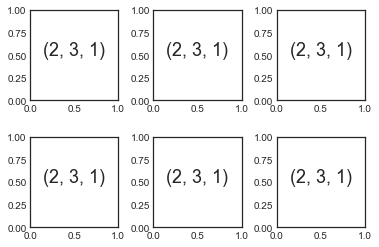

In [9]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)  #擴大間距

for i in range(1, 7):
    plt.subplot(2, 3, i)
    plt.text(0.5,0.5, str((2,3,1)),fontsize=18, ha='center')

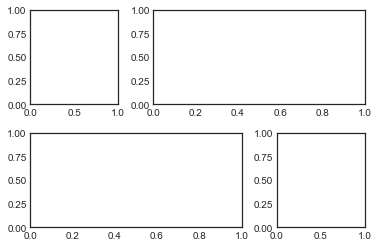

In [10]:
grid = plt.GridSpec(2,3,wspace=0.4,hspace=0.3)
plt.subplot(grid[0, 0])
plt.subplot(grid[0, 1:])
plt.subplot(grid[1, :2])
plt.subplot(grid[1, 2]);

## `plt.subplots`：一句代碼設置所有網格子圖表

> The approach just described can become quite tedious when creating a large grid of subplots, especially if you'd like to hide the x- and y-axis labels on the inner plots.
For this purpose, ``plt.subplots()`` is the easier tool to use (note the ``s`` at the end of ``subplots``). Rather than creating a single subplot, this function creates a full grid of subplots in a single line, returning them in a NumPy array.
The arguments are the number of rows and number of columns, along with optional keywords ``sharex`` and ``sharey``, which allow you to specify the relationships between different axes.

上面的方法當我們需要創建大量的子圖表網格時會變得非常冗長乏味，特別是如果我們需要將內部圖表x軸和y軸標籤隱藏的情況下。因此，`plt.subplots`在這種情況下是一個合適的工具（注意末尾有個s）。這個函數會一次性創建所有的網格子圖表，而不是單個網格，並將它們在一個NumPy數組中返回。參數是行數和列數，還有兩個可選的關鍵字參數`sharex`和`sharey`，可以讓你指定不同子圖表之間的關聯。

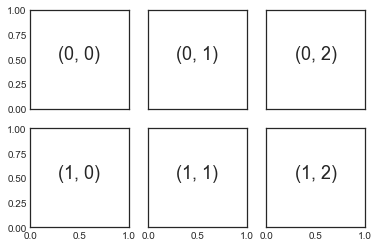

In [11]:
#subplot+s , 創建 2×3 網格的子圖，其中每行的子圖表共享它們的xy軸
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')  

for i in range(2):   #text
    for j in range(3):
        ax[i, j].text(0.5, 0.5, str((i, j)),fontsize=18, ha='center')

## Creating Figures and Subplots

<Figure size 432x288 with 0 Axes>

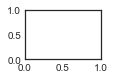

In [12]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure()
fig = plt.figure(figsize = (3,2))  # blank plot
ax1 = fig.add_subplot(2,2,1)

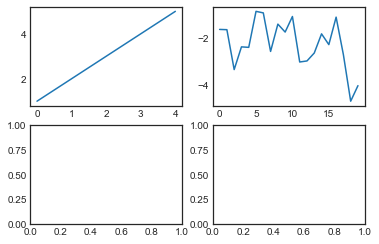

In [13]:
fig = plt.figure(figsize = (6,4)) # blank plot: big:8*6  small:6*4 

ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

ax1.plot([1,2,3,4,5])
ax2.plot(np.random.randn(20).cumsum())

We can adjust the spaces around the subplot by using these arguments:

**hspace(wspace)** : to adjust the **height(width)** between the subplots

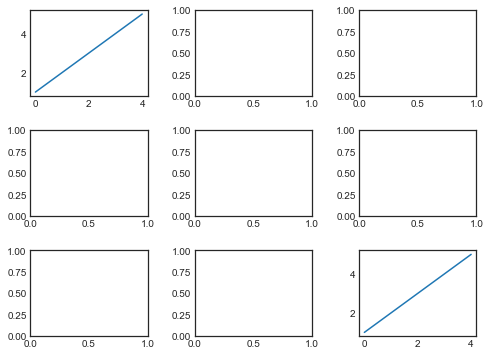

In [14]:
fig, ax = plt.subplots(3, 3, figsize = (8,6))
ax[0,0].plot([1,2,3,4,5])
ax[2,2].plot([1,2,3,4,5])
fig.subplots_adjust(hspace=.4, wspace =0.4)  # adjust distance of each

## ``plt.axes``: Subplots by Hand 手動構建子圖表

> For example, we might create an inset axes at the top-right corner of another axes by setting the *x* and *y* position to 0.65 (that is, starting at 65% of the width and 65% of the height of the figure) and the *x* and *y* extents to 0.2 (that is, the size of the axes is 20% of the width and 20% of the height of the figure):

例如，我們可以在距離左邊和底部65%的位置，以插圖的形式放置一個寬度和高度都是20%子圖表，上述數值應該為`[0.65, 0.65, 0.2, 0.2]`：

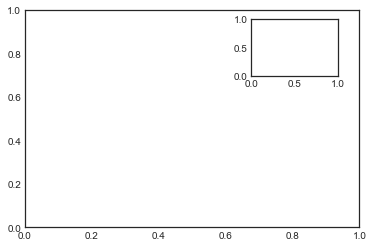

In [15]:
ax1 = plt.axes()  # 標準圖表
ax2 = plt.axes([0.65,0.65,0.2,0.2]) #子圖表 [left, bottom, width, height]`（取值都是0-1)

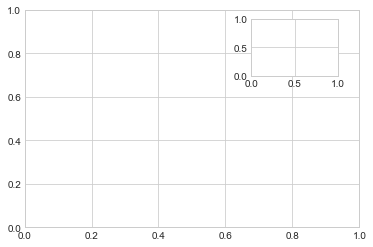

In [16]:
plt.style.use('seaborn-whitegrid')
ax1 = plt.axes()
ax2 = plt.axes([0.65,0.65,0.2,0.2])

## `plt.GridSpec`：更複雜的排列

> To go beyond a regular grid to subplots that span multiple rows and columns, ``plt.GridSpec()`` is the best tool.
The ``plt.GridSpec()`` object does not create a plot by itself; it is simply a convenient interface that is recognized by the ``plt.subplot()`` command.
For example, a gridspec for a grid of two rows and three columns with some specified width and height space looks like this:

當你需要子圖表在網格中佔據多行或多列時，`plt.GridSpec()`正是你所需要的。 `plt.GridSpec()`對象並不自己創建圖表；它只是一個可以被傳遞給`plt.subplot()`的參數。例如，一個兩行三列並帶有指定的寬度高度間隔的gridspec可以如下創建：

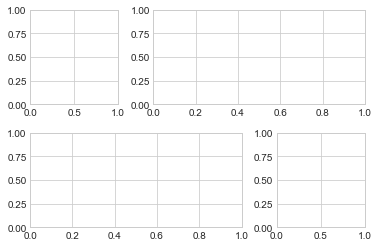

In [17]:
grid = plt.GridSpec(2, 3, wspace=0.4, hspace=0.3)
plt.subplot(grid[0, 0])
plt.subplot(grid[0, 1:])
plt.subplot(grid[1, :2])
plt.subplot(grid[1, 2]);

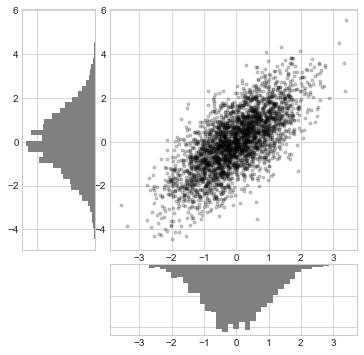

In [18]:
# 使用GridSpec創建網格並加入子圖表
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)


# 構建二維正態分佈數據
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 3000).T


main_ax.plot(x, y, 'ok', markersize=3, alpha=0.2)   # 在主圖表中繪製散點圖
x_hist.hist(x, 40, histtype='stepfilled',orientation='vertical'  ,color='gray') # 直方圖倒轉y軸方向
x_hist.invert_yaxis() 
y_hist.hist(y, 40, histtype='stepfilled',orientation='horizontal',color='gray') # 直方圖倒轉x軸方向
y_hist.invert_xaxis() 

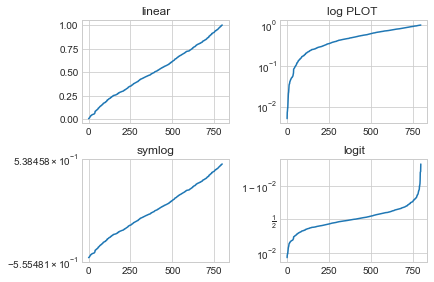

In [19]:
from matplotlib.ticker import NullFormatter # useful for `logi

np.random.seed(19680801)
# make up some data in the interval ]0, 1[
y = np.random.normal(loc=0.5, scale=0.4, size=1000)
y = y[(y > 0) & (y < 1)]
y.sort()
x = np.arange(len(y))
plt.figure(1)

# linear
plt.subplot(221)
plt.plot(x, y)
plt.yscale('linear')
plt.title('linear')
plt.grid(True)

# log
plt.subplot(222)
plt.plot(x, y)
plt.yscale('log')
plt.title('log PLOT ')
plt.grid(True)

# symmetric log
plt.subplot(223)
plt.plot(x, y - y.mean())
plt.yscale('symlog')
plt.title('symlog')
plt.grid(True)

# logit
plt.subplot(224)
plt.plot(x, y)
plt.yscale('logit')
plt.title('logit')
plt.grid(True)


plt.gca().yaxis.set_minor_formatter(NullFormatter())
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.9,hspace=0.35,wspace=0.35)
plt.show()

<!--NAVIGATION-->
< [自定义颜色条](04.07-Customizing-Colorbars.ipynb) | [目录](Index.ipynb) | [文本和标注](04.09-Text-and-Annotation.ipynb) >

<a href="https://colab.research.google.com/github/wangyingsm/Python-Data-Science-Handbook/blob/master/notebooks/04.08-Multiple-Subplots.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>
